In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import model_selection

In [2]:
import pandas
Data = pandas.read_csv('Cleaned_Data.csv')
Data

,file content,class number
0,As summer the usual are being made Me was thin...,0
1,Southern 41493 Please send me any to this ride...,0
2,1 Trying to figure out a way to put a halogen ...,0
3,In article Frank Ball wrote The 400 model is e...,0
4,Eric Nelson My 83 Nighthawk two related with t...,0
...,...,...
18702,12GB hard Drive Brand NEW with full factory wa...,19
18703,my 14 monitor id dead due to the failure if yo...,19
18704,selling 388 worth of for 100 or Ill split it i...,19
18705,Computer card good for doing graphics on your ...,19


In [3]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(Data['file content'], Data['class number'])


In [4]:
vocab_size = 5000

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index


In [5]:
train_sequences = tokenizer.texts_to_sequences(train_x)

[12, 62, 7, 24, 506, 639, 5, 127, 57, 111, 18, 100, 5, 7, 24, 819, 22, 166, 82, 171, 48, 53, 107, 61, 554, 20, 1048, 6, 1796, 76, 10, 679, 15, 11, 46, 265, 2, 1286, 21, 4194, 4, 84, 7, 173, 2, 295, 6, 31, 224, 1753, 5, 7, 259, 9, 4, 265, 142, 75, 15, 29, 2732, 3447, 9, 8, 27, 155, 5, 44, 179, 1, 730, 1000, 42, 32, 7, 54, 379, 8, 67, 4, 56, 30, 15, 14, 29, 755, 42, 166, 209, 48, 67, 31, 155, 30, 209, 48, 32, 7, 30, 21, 323, 4194, 57, 2207, 4, 224, 77, 18, 100, 10, 224, 419, 9, 17, 331, 10, 516, 2, 773, 42, 10, 280, 1031, 2, 773, 18, 57, 43, 218, 3, 1, 7, 70, 10, 7, 88, 1677, 225, 48, 6, 3190, 116, 280, 9, 25, 70, 4, 108, 2, 4194, 5, 24, 336, 27, 1, 2067, 773, 9, 25, 183, 16, 9, 108, 2137, 32, 2137, 233, 1476, 3989, 3, 1, 571, 776, 18, 4, 2733, 23, 2, 1, 198, 3, 31, 930, 1, 1039, 44, 55, 71, 32, 8, 6, 1, 1000, 9, 8, 1, 2120, 264, 96, 1, 337, 696, 8, 321, 14, 3350, 133, 1, 1039, 1, 1070, 2, 1, 8, 4, 1001, 696, 5, 1, 1777, 2868, 457, 10, 8, 2, 3251, 6, 9, 1001, 1889, 6, 287, 2, 15, 2583, 1

In [6]:
max_length = 300
padding_type = 'post'
trunc_type = 'post'


train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

69
300
16
300
355
300


In [7]:
validation_sequences = tokenizer.texts_to_sequences(test_x)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

4677
(4677, 300)


In [8]:
embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(20, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1300      
Total params: 395,604
Trainable params: 395,604
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 15
history = model.fit(train_padded, train_y, epochs=num_epochs, validation_data=(validation_padded, test_y), verbose=2)

Epoch 1/15
439/439 - 145s - loss: 2.6067 - accuracy: 0.1299 - val_loss: 2.3326 - val_accuracy: 0.1941
Epoch 2/15
439/439 - 111s - loss: 2.0341 - accuracy: 0.2676 - val_loss: 2.2744 - val_accuracy: 0.2598
Epoch 3/15
439/439 - 112s - loss: 1.5967 - accuracy: 0.4185 - val_loss: 1.5878 - val_accuracy: 0.4655
Epoch 4/15
439/439 - 122s - loss: 1.1846 - accuracy: 0.5659 - val_loss: 1.4711 - val_accuracy: 0.5208
Epoch 5/15
439/439 - 124s - loss: 0.9209 - accuracy: 0.6740 - val_loss: 1.2923 - val_accuracy: 0.5976
Epoch 6/15
439/439 - 124s - loss: 0.7282 - accuracy: 0.7478 - val_loss: 1.3457 - val_accuracy: 0.6130
Epoch 7/15
439/439 - 79s - loss: 0.6012 - accuracy: 0.7962 - val_loss: 1.2854 - val_accuracy: 0.6506
Epoch 8/15
439/439 - 59s - loss: 0.5009 - accuracy: 0.8366 - val_loss: 1.2987 - val_accuracy: 0.6647
Epoch 9/15
439/439 - 59s - loss: 0.4576 - accuracy: 0.8550 - val_loss: 1.3637 - val_accuracy: 0.6632
Epoch 10/15
439/439 - 59s - loss: 0.3844 - accuracy: 0.8793 - val_loss: 1.3580 - val_

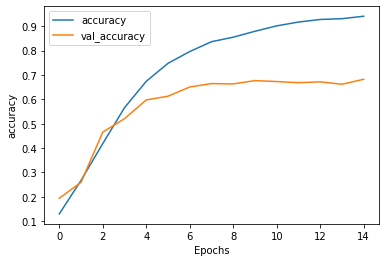

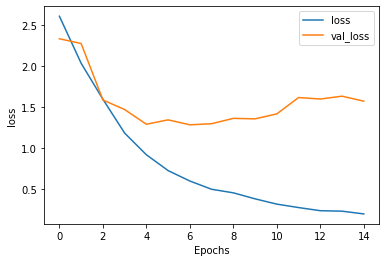

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")